### Churn Prediction

### Attribute Information: ### 

The dataset depicts the details of the telecom customer, like, services that each customer has signed for, customer account information , and their demographic info etc.


#### Demographics Data : ####
	•	HouseholdID : Each Household id
	•    Country : Country. (For this attribute, missing values are denoted as “?”)
	•	State : State (For this attribute, missing values are denoted as “?”)
	•	Retired : Whether retired
	•	HasPartner : Demographic information - whether the customer has partner (1-Yes; 2-No)
	•	HasDependents : Demographic information - whether the customer has dependents (1-Yes; 2-No)
	•	Education : Education qualification
	•	Gender : Demographic information – gender

#### Account Information :
	•	CustomerID : CustomerID
    •   BaseCharges : Customer account information (Charges for Base plan)
	•	DOC : Date of data collection
	•	TotalCharges : Customer account information (Total).(For this attribute, missing values are denoted as “MISSINGVAL”                        also)
	•	DOE : Date of entry as customer
	•	ElectronicBilling : Customer account information - whether electronic billing
	•	ContractType : Contract type (For this attribute, 	missing values are denoted as “NA”)
	•	PaymentMethod : payment method

#### Data of ServicedOptedFor : 
	•	CustomerID : CustomerID
	•	TypeOfService : Service signed for    
	•	SeviceDetails : 

#### Churn Data : 	
	•	CustomerID : Customer ID
	•	Churn : Whether the customer churns  (Target)


In [1]:
# import modules
import pandas as pd
import numpy as np

#### Loading the data

In [2]:
# Train
train = pd.read_csv('TrainData\Train.csv')
accinfo = pd.read_csv('TrainData\Train_Accountinfo.csv',na_values=['NA','MISSINGVAL'])
demographics = pd.read_csv('TrainData\Train_Demographics.csv',na_values='?')
services = pd.read_csv('TrainData\Train_ServicesOptedFor.csv')

In [3]:
# Test
test = pd.read_csv('TestData\Test.csv')
taccinfo = pd.read_csv('TestData\Test_Accountinfo.csv',na_values=['NA','MISSINGVAL'])
tdemographics = pd.read_csv('TestData\Test_Demographics.csv',na_values='?')
tservices = pd.read_csv('TestData\Test_ServicesOptedFor.csv')

#### Dimensions

In [4]:
# Shapes of the train data 
print(train.shape)
print(accinfo.shape)
print(demographics.shape)
print(services.shape)

(5298, 2)
(5298, 8)
(5298, 8)
(47682, 3)


In [5]:
# Shapes of test data
print(test.shape)
print(taccinfo.shape)
print(tdemographics.shape)
print(tservices.shape)

(1769, 1)
(1769, 8)
(1769, 8)
(15921, 3)


From the data, we know that we have CustomerID as PrimaryKey 

In [6]:
# unique columns in datasets
print(len(train.CustomerID.unique()))
print(len(accinfo.CustomerID.unique()))
print(len(demographics.HouseholdID.unique()))
print(len(services.CustomerID.unique()))

5298
5298
5298
5298


###### Merging the data frames by CustomerID

In [7]:
# Train
n1 = pd.merge(train,accinfo,on='CustomerID')

In [8]:
# We have HouseholdID in demographics which is CustomerID so renaming the column. 
demographics.columns = ['CustomerID', 'Country', 'State', 'Retired', 'HasPartner',
       'HasDependents', 'Education', 'Gender']

In [9]:
new = pd.merge(n1,demographics,on='CustomerID')

In [10]:
# Dimensions
new.shape

(5298, 16)

In [11]:
# Test
tdemographics.columns = ['CustomerID', 'Country', 'State', 'Retired', 'HasPartner',
       'HasDependents', 'Education', 'Gender']

In [12]:
tnew = pd.merge(taccinfo,tdemographics,on='CustomerID')

In [13]:
tnew.shape

(1769, 15)

** Services ** have shape (15921, 3)

In [14]:
# count - categories 
services.SeviceDetails.value_counts()

No                     17410
Yes                    13390
No internet service     6936
1                       4792
Fiber optic             2313
DSL                     1829
0                        506
No phone service         506
Name: SeviceDetails, dtype: int64

In [15]:
# Changing the attribute types to category
services.SeviceDetails = services.SeviceDetails.astype('category')

In [16]:
# Test
tservices.SeviceDetails = tservices.SeviceDetails.astype('category')

* Dataframe is in long format, we should make it into wide foramt 

In [17]:
# Label Encoding
services.SeviceDetails = services.SeviceDetails.cat.codes
services.SeviceDetails.value_counts()

4    17410
7    13390
5     6936
1     4792
3     2313
2     1829
6      506
0      506
Name: SeviceDetails, dtype: int64

In [18]:
tservices.SeviceDetails = tservices.SeviceDetails.cat.codes
tservices.SeviceDetails.value_counts()

4    6336
7    3991
5    2256
1    1593
3     797
2     596
6     176
0     176
Name: SeviceDetails, dtype: int64

In [19]:
# creating a multilevel index with values as serviceDetails
n = services.pivot_table(index="CustomerID", columns="TypeOfService",values = "SeviceDetails")

In [20]:
n.head()

TypeOfService,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
CustomerID,,,,,,,,,
Cust1201,7,1,3,4,4,4,7,7,4
Cust1202,5,1,4,4,5,5,5,5,5
Cust1203,4,1,3,4,4,4,7,4,4
Cust1204,4,1,2,7,7,7,4,4,7
Cust1205,4,1,3,7,4,4,4,4,4


In [21]:
ser = np.matrix(n)

In [22]:
ser = pd.DataFrame(ser,columns=n.columns)
ser.head()

TypeOfService,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,7,1,3,4,4,4,7,7,4
1,5,1,4,4,5,5,5,5,5
2,4,1,3,4,4,4,7,4,4
3,4,1,2,7,7,7,4,4,7
4,4,1,3,7,4,4,4,4,4


In [23]:
tn = tservices.pivot_table(index="CustomerID", columns="TypeOfService",values = "SeviceDetails")

In [24]:
tser = np.matrix(tn)

In [25]:
tser = pd.DataFrame(tser,columns=tn.columns)
tser.head()

TypeOfService,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,7,1,2,4,4,7,4,4,4
1,4,1,2,4,7,7,4,4,4
2,4,1,2,4,4,7,4,4,4
3,7,1,3,4,7,4,7,4,4
4,7,0,2,6,4,4,7,4,4


In [26]:
# concatinating the data frames
final = pd.concat([new,ser],1) # train 
tfinal = pd.concat([tnew,tser],1) # test

In [27]:
final.head() # view

,CustomerID,Churn,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod,Country,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,Cust1201,No,478.50,05-01-2012,5920.00,10-Jan-11,No,One year,Electronic check,India,...,Male,7,1,3,4,4,4,7,7,4
1,Cust1202,No,103.25,05-01-2012,103.25,06-Dec-11,No,Month-to-month,Electronic check,India,...,Male,5,1,4,4,5,5,5,5,5
2,Cust1203,No,399.75,05-01-2012,5217.00,10-Jan-11,Yes,Month-to-month,Bank transfer (automatic),India,...,Male,4,1,3,4,4,4,7,4,4
3,Cust1204,No,324.75,05-01-2012,22757.50,06-Apr-06,No,One year,Bank transfer (automatic),India,...,Male,4,1,2,7,7,7,4,4,7
4,Cust1205,Yes,372.50,05-01-2012,372.50,06-Dec-11,Yes,Month-to-month,Electronic check,India,...,Female,4,1,3,7,4,4,4,4,4


In [28]:
tfinal.head()

,CustomerID,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod,Country,State,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,Cust12767,447.75,5-1-2012,10935.75,15-Jan-10,Yes,Month-to-month,Electronic check,India,Maharashtra,...,Male,7,1,2,4,4,7,4,4,4
1,Cust11911,253.50,5-1-2012,1072.75,7-Sep-11,No,Month-to-month,Electronic check,India,Maharashtra,...,Female,4,1,2,4,7,7,4,4,4
2,Cust12382,478.00,5-1-2012,23917.50,27-Dec-07,Yes,Month-to-month,Electronic check,India,Maharashtra,...,Female,4,1,2,4,4,7,4,4,4
3,Cust11422,278.50,5-1-2012,1297.00,8-Aug-11,Yes,Month-to-month,Mailed check,India,Maharashtra,...,Male,7,1,3,4,7,4,7,4,4
4,Cust11471,426.00,5-1-2012,7769.50,14-Jul-10,Yes,Month-to-month,Electronic check,India,Maharashtra,...,Female,7,0,2,6,4,4,7,4,4


#### Missing Values

In [29]:
print(final.isnull().sum())
print('\n Total:\t\t', final.isnull().any(1).sum())

CustomerID                  0
Churn                       0
BaseCharges                 0
DOC                         0
TotalCharges               10
DOE                         0
ElectronicBilling           0
ContractType                5
PaymentMethod               0
Country                     5
State                       8
Retired                     0
HasPartner                  0
HasDependents               0
Education                  10
Gender                      4
DeviceProtection            0
HasPhoneService             0
InternetServiceCategory     0
MultipleLines               0
OnlineBackup                0
OnlineSecurity              0
StreamingMovies             0
StreamingTelevision         0
TechnicalSupport            0
dtype: int64

 Total:		 42


In [30]:
# Drop the columns with no variance and unique values
final = final.drop(['CustomerID','Country','State'],1)
tfinal = tfinal.drop(['CustomerID','Country','State'],1)

In [31]:
print(final.isnull().sum())
print('\n Total:\t\t', final.isnull().any(1).sum())

Churn                       0
BaseCharges                 0
DOC                         0
TotalCharges               10
DOE                         0
ElectronicBilling           0
ContractType                5
PaymentMethod               0
Retired                     0
HasPartner                  0
HasDependents               0
Education                  10
Gender                      4
DeviceProtection            0
HasPhoneService             0
InternetServiceCategory     0
MultipleLines               0
OnlineBackup                0
OnlineSecurity              0
StreamingMovies             0
StreamingTelevision         0
TechnicalSupport            0
dtype: int64

 Total:		 29


In [32]:
# Missing values are missing at random, so there is no pattern in it.
final[final.isnull().any(1)]

,Churn,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
503,No,98.50,05-01-2012,NaN,05-Jan-12,Yes,One year,Mailed check,0,1,...,Male,5,1,4,4,5,5,5,5,5
640,No,302.50,05-01-2012,15607.25,28-Oct-07,No,NaN,Credit card (automatic),0,1,...,Male,4,1,2,4,7,7,4,4,7
682,No,128.75,05-01-2012,NaN,05-Jan-12,No,Two year,Mailed check,0,1,...,Male,5,1,4,7,5,5,5,5,5
687,No,148.75,05-01-2012,1509.50,11-Mar-11,No,Month-to-month,Mailed check,0,2,...,Female,4,0,2,6,4,7,4,4,4
879,No,239.25,05-01-2012,9432.00,22-Oct-08,Yes,One year,Electronic check,0,2,...,Female,4,1,2,4,4,7,4,4,4
958,No,121.50,05-01-2012,8216.25,05-Feb-06,No,Two year,Bank transfer (automatic),0,1,...,Male,5,1,4,7,5,5,5,5,5
1138,No,276.50,05-01-2012,7653.00,19-Jul-09,Yes,Month-to-month,Bank transfer (automatic),0,2,...,Female,4,1,2,4,7,7,4,4,4
1161,No,445.50,05-01-2012,9747.00,16-Mar-10,Yes,Month-to-month,Credit card (automatic),0,2,...,NaN,4,1,3,7,7,4,4,7,4
1241,No,386.75,05-01-2012,27750.50,07-Mar-06,No,Two year,Credit card (automatic),0,2,...,Female,7,1,2,4,7,7,4,7,7
1496,No,98.75,05-01-2012,NaN,06-Dec-11,No,Month-to-month,Mailed check,0,2,...,Male,5,1,4,4,5,5,5,5,5


In [33]:
final = final.dropna() # Drop missing values 

In [34]:
final.to_csv('f.csv',index=False)
final = pd.read_csv('f.csv')

In [35]:
final.head()

,Churn,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,No,478.50,05-01-2012,5920.00,10-Jan-11,No,One year,Electronic check,0,2,...,Male,7,1,3,4,4,4,7,7,4
1,No,103.25,05-01-2012,103.25,06-Dec-11,No,Month-to-month,Electronic check,0,2,...,Male,5,1,4,4,5,5,5,5,5
2,No,399.75,05-01-2012,5217.00,10-Jan-11,Yes,Month-to-month,Bank transfer (automatic),0,2,...,Male,4,1,3,4,4,4,7,4,4
3,No,324.75,05-01-2012,22757.50,06-Apr-06,No,One year,Bank transfer (automatic),0,2,...,Male,4,1,2,7,7,7,4,4,7
4,Yes,372.50,05-01-2012,372.50,06-Dec-11,Yes,Month-to-month,Electronic check,0,2,...,Female,4,1,3,7,4,4,4,4,4


#### Type Casting

In [36]:
num = [ 'BaseCharges',  'TotalCharges' ]
date = ['DOC', 'DOE']      
cat = ['Churn','ElectronicBilling','ContractType', 'PaymentMethod', 
       'Retired', 'HasPartner', 'HasDependents', 'Education',
        'Gender','DeviceProtection', 'HasPhoneService',
       'InternetServiceCategory', 'MultipleLines', 'OnlineBackup',
       'OnlineSecurity', 'StreamingMovies', 'StreamingTelevision',
       'TechnicalSupport']

##### Categorical

In [37]:
# Changing attributes to category
for i in cat:
    final[i] = final[i].astype('category')

In [38]:
# Label Encoding for categorical attributes
for i in cat:
    final[i] = final[i].cat.codes
for i in cat:
    final[i] = final[i].astype('category')

In [39]:
# Test
for i in cat[1:]:
    tfinal[i] = tfinal[i].astype('category')

In [40]:
for i in cat[1:]:
    tfinal[i] = tfinal[i].cat.codes
for i in cat[1:]:
    tfinal[i] = tfinal[i].astype('category')

In [41]:
final.to_csv('fin.csv')# write data

In [42]:
final.head()

,Churn,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,0,478.50,05-01-2012,5920.00,10-Jan-11,0,1,2,0,1,...,1,2,1,1,0,0,0,2,2,0
1,0,103.25,05-01-2012,103.25,06-Dec-11,0,0,2,0,1,...,1,1,1,2,0,1,1,1,1,1
2,0,399.75,05-01-2012,5217.00,10-Jan-11,1,0,0,0,1,...,1,0,1,1,0,0,0,2,0,0
3,0,324.75,05-01-2012,22757.50,06-Apr-06,0,1,0,0,1,...,1,0,1,0,2,2,2,0,0,2
4,1,372.50,05-01-2012,372.50,06-Dec-11,1,0,2,0,1,...,0,0,1,1,2,0,0,0,0,0


### UniVariate Analysis:

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

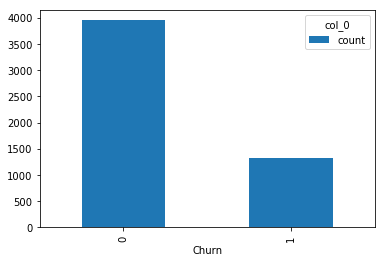

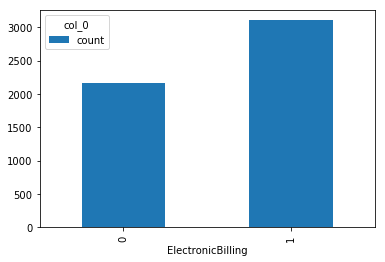

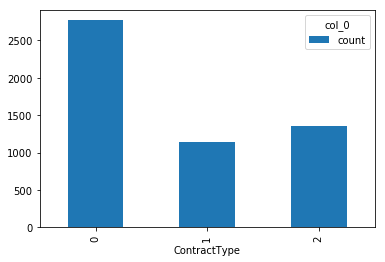

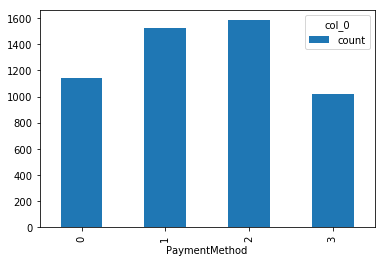

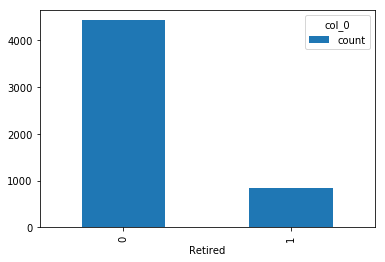

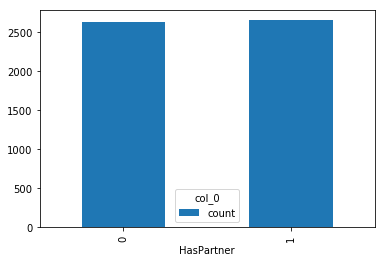

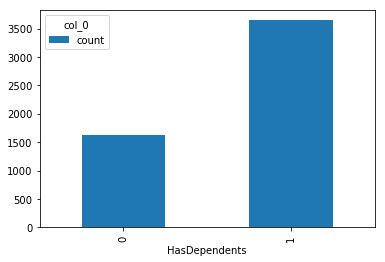

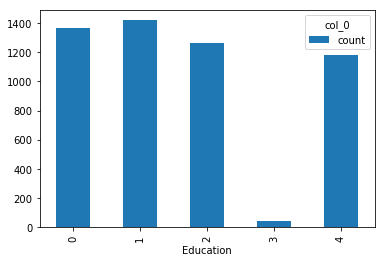

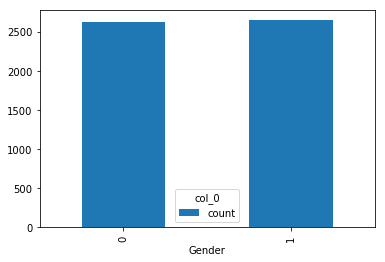

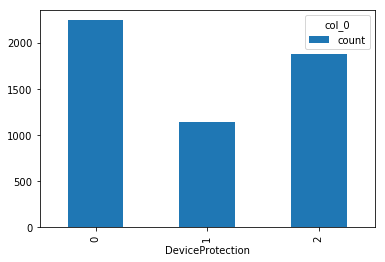

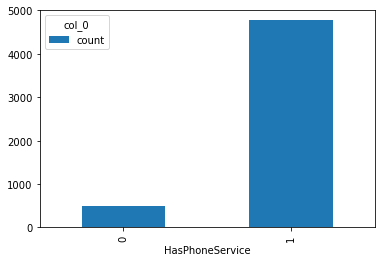

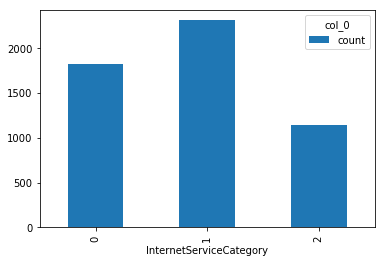

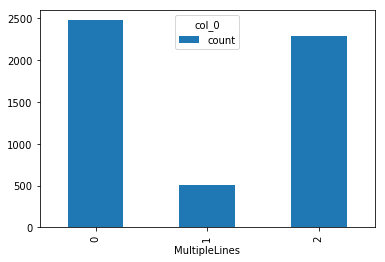

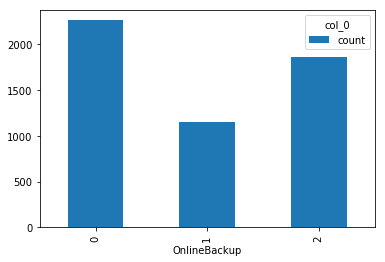

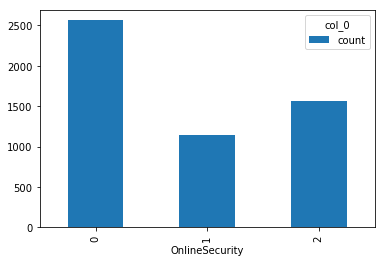

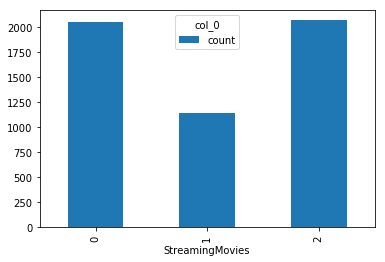

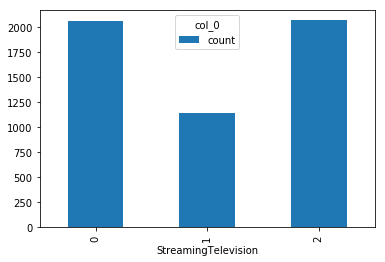

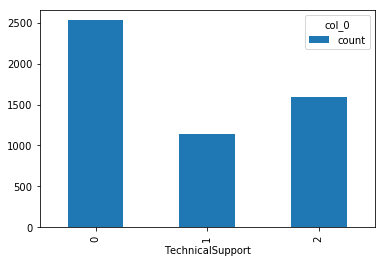

In [44]:
# Plots for categorical attributes
for i in cat:
    pd.crosstab(final[i],columns='count').plot(kind = 'bar')
    plt.savefig(i)

### Numerical

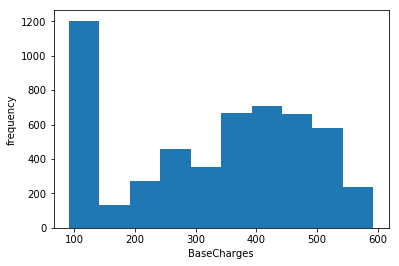

In [45]:
for i in num:
    final[i] = final[i].astype('int')
# Base Charges plot    
plt.figure()
final.BaseCharges.hist(grid = False)
plt.xlabel('BaseCharges')
plt.ylabel('frequency')
plt.savefig('base_hist.png')

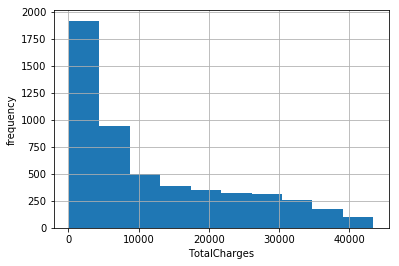

In [46]:
# Total Charges plot
plt.figure()
final.TotalCharges.hist()
plt.xlabel('TotalCharges')
plt.ylabel('frequency')
plt.savefig('tot_hist.png')

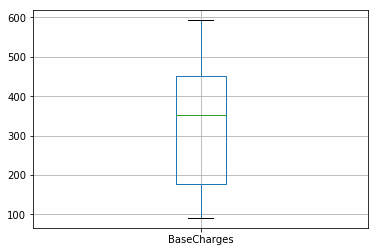

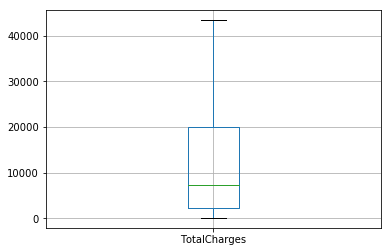

In [47]:
# Box plots
for i in num:
    final.boxplot(i) 
    plt.show()
    plt.savefig(i)

### Date

In [48]:
import datetime

In [49]:
# Date time format
final.DOC = pd.to_datetime(final.DOC)
tfinal.DOC = pd.to_datetime(tfinal.DOC)

In [50]:
final.DOE = pd.to_datetime(final.DOE)
tfinal.DOE = pd.to_datetime(tfinal.DOE)

#### Feature Engineering

In [51]:
# Age is the lifetime of the customer 
final['Age'] = final.DOC - final.DOE
tfinal['Age'] = tfinal.DOC - tfinal.DOE

In [52]:
# Converting to int, models does not accept timedelta
final.Age = (final.Age / np.timedelta64(1, 'D')).astype(int)
tfinal.Age = (tfinal.Age / np.timedelta64(1, 'D')).astype(int)

In [53]:
tfinal.head()

,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,HasDependents,...,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport,Age
0,447.75,2012-05-01,10935.75,2010-01-15,1,0,1,0,1,1,...,2,1,0,0,0,2,0,0,0,837
1,253.50,2012-05-01,1072.75,2011-09-07,0,0,1,0,1,1,...,0,1,0,0,2,2,0,0,0,237
2,478.00,2012-05-01,23917.50,2007-12-27,1,0,1,0,0,0,...,0,1,0,0,0,2,0,0,0,1587
3,278.50,2012-05-01,1297.00,2011-08-08,1,0,2,0,0,0,...,2,1,1,0,2,0,2,0,0,267
4,426.00,2012-05-01,7769.50,2010-07-14,1,0,1,0,1,1,...,2,0,0,1,0,0,2,0,0,657


** correlation **

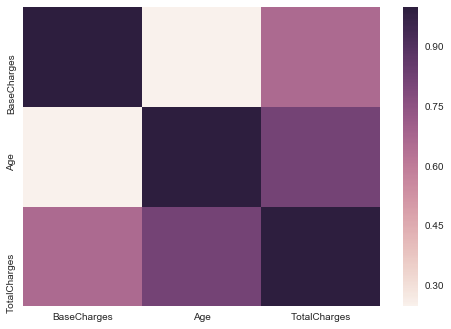

In [54]:
import seaborn as sns 
sns.heatmap(final[['BaseCharges','Age','TotalCharges']].corr())

#### Standardization

In [55]:
# Numerical variables
num_var = final[['BaseCharges','Age' ]]
num_var.shape
tnum_var = tfinal[['BaseCharges', 'Age' ]]
tnum_var.shape

(1769, 2)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [57]:
num_scaled = pd.DataFrame(scaler.fit_transform(num_var),columns=num_var.columns)
num_scaled.head()

,BaseCharges,Age
0,0.770916,0.154930
1,0.023904,0.000000
2,0.613546,0.154930
3,0.464143,0.971831
4,0.559761,0.000000


In [58]:
tnum_var.isnull().sum()

BaseCharges    0
Age            0
dtype: int64

In [59]:
tnum_scaled = pd.DataFrame(scaler.fit_transform(tnum_var),columns=tnum_var.columns)

In [60]:
tnum_scaled.shape

(1769, 2)

In [61]:
# Dropping all the columns as we already have them
final = final.drop(['TotalCharges','BaseCharges','Age'],1)

In [62]:
tfinal = tfinal.drop(['TotalCharges','BaseCharges','Age'],1)

In [63]:
final = pd.concat([num_scaled,final],1) # concatenation

In [64]:
final.head()

,BaseCharges,Age,Churn,DOC,DOE,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,0.770916,0.154930,0,2012-05-01,2011-01-10,0,1,2,0,1,...,1,2,1,1,0,0,0,2,2,0
1,0.023904,0.000000,0,2012-05-01,2011-12-06,0,0,2,0,1,...,1,1,1,2,0,1,1,1,1,1
2,0.613546,0.154930,0,2012-05-01,2011-01-10,1,0,0,0,1,...,1,0,1,1,0,0,0,2,0,0
3,0.464143,0.971831,0,2012-05-01,2006-04-06,0,1,0,0,1,...,1,0,1,0,2,2,2,0,0,2
4,0.559761,0.000000,1,2012-05-01,2011-12-06,1,0,2,0,1,...,0,0,1,1,2,0,0,0,0,0


In [65]:
tfinal = pd.concat([tnum_scaled,tfinal],1)

In [66]:
tfinal.head()

,BaseCharges,Age,DOC,DOE,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,HasDependents,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,0.711856,0.333333,2012-05-01,2010-01-15,1,0,1,0,1,1,...,1,2,1,0,0,0,2,0,0,0
1,0.323162,0.055556,2012-05-01,2011-09-07,0,0,1,0,1,1,...,0,0,1,0,0,2,2,0,0,0
2,0.772386,0.680556,2012-05-01,2007-12-27,1,0,1,0,0,0,...,0,0,1,0,0,0,2,0,0,0
3,0.373187,0.069444,2012-05-01,2011-08-08,1,0,2,0,0,0,...,1,2,1,1,0,2,0,2,0,0
4,0.668334,0.250000,2012-05-01,2010-07-14,1,0,1,0,1,1,...,0,2,0,0,1,0,0,2,0,0


In [67]:
final.columns # Columns 

Index(['BaseCharges', 'Age', 'Churn', 'DOC', 'DOE', 'ElectronicBilling',
       'ContractType', 'PaymentMethod', 'Retired', 'HasPartner',
       'HasDependents', 'Education', 'Gender', 'DeviceProtection',
       'HasPhoneService', 'InternetServiceCategory', 'MultipleLines',
       'OnlineBackup', 'OnlineSecurity', 'StreamingMovies',
       'StreamingTelevision', 'TechnicalSupport'],
      dtype='object')

In [68]:
final.shape #dimensions

(5269, 22)

In [69]:
final.to_csv('tab.csv')

In [70]:
te_x  = tfinal.drop(['DOC','DOE'],1) # derived new column from DOC and DOE, so we drop them

In [71]:
te_x.head()

,BaseCharges,Age,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,HasDependents,Education,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,0.711856,0.333333,1,0,1,0,1,1,1,1,2,1,0,0,0,2,0,0,0
1,0.323162,0.055556,0,0,1,0,1,1,4,0,0,1,0,0,2,2,0,0,0
2,0.772386,0.680556,1,0,1,0,0,0,4,0,0,1,0,0,0,2,0,0,0
3,0.373187,0.069444,1,0,2,0,0,0,4,1,2,1,1,0,2,0,2,0,0
4,0.668334,0.250000,1,0,1,0,1,1,1,0,2,0,0,1,0,0,2,0,0


In [72]:
y = final.Churn # Target
x = final.drop(['Churn','DOC','DOE'],1) 

In [73]:
x.head()

,BaseCharges,Age,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,HasDependents,Education,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,0.770916,0.154930,0,1,2,0,1,1,2,1,2,1,1,0,0,0,2,2,0
1,0.023904,0.000000,0,0,2,0,1,1,4,1,1,1,2,0,1,1,1,1,1
2,0.613546,0.154930,1,0,0,0,1,1,4,1,0,1,1,0,0,0,2,0,0
3,0.464143,0.971831,0,1,0,0,1,0,4,1,0,1,0,2,2,2,0,0,2
4,0.559761,0.000000,1,0,2,0,1,1,4,0,0,1,1,2,0,0,0,0,0


In [74]:
# Percentage of target variable 
print('0 :',(y.value_counts()[0]/y.value_counts().sum())*100)
print('1 :',(y.value_counts()[1]/y.value_counts().sum())*100)


0 : 74.9478079332
1 : 25.0521920668


### Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,stratify = y)

### Model Building:

**Decision tree :**

Decision Tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets using greedy approach.

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [78]:
# gini index - CART(Classification and Refression Tree)
tree = DecisionTreeClassifier(class_weight='balanced') 

In [79]:
tree.fit(xtrain,ytrain) # Train the model

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
tree.score(xtrain,ytrain) #Accuracy

0.99762752075919336

In [81]:
print('\n Classification Report:\n\n',metrics.classification_report(ytest,tree.predict(xtest))) 
print('Accuracy',metrics.accuracy_score(ytest,tree.predict(xtest))) 


 Classification Report:

              precision    recall  f1-score   support

          0       0.83      0.83      0.83       790
          1       0.48      0.48      0.48       264

avg / total       0.74      0.74      0.74      1054

Accuracy 0.740037950664


In [82]:
# Entropy - C5.0
entropy = DecisionTreeClassifier(criterion='entropy',class_weight='balanced') # entropy

In [83]:
entropy.fit(xtrain,ytrain) #Train the model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
entropy.score(xtest,ytest) # accuracy

0.74383301707779881

In [85]:
print('\n Classification Report:\n\n',metrics.classification_report(ytest,entropy.predict(xtest))) 
print('Accuracy :',metrics.accuracy_score(ytest,entropy.predict(xtest))) 


 Classification Report:

              precision    recall  f1-score   support

          0       0.83      0.83      0.83       790
          1       0.49      0.50      0.49       264

avg / total       0.75      0.74      0.74      1054

Accuracy : 0.743833017078


**Random Forest:**  

Random Forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multiple decision trees at training time and outputting the class that is the mode of the classes for classification and mean prediction for regression.

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
r = RandomForestClassifier(n_estimators=100,n_jobs=-1,oob_score=True,
                           class_weight='balanced',max_depth=14,random_state = 20,max_leaf_nodes = 29,min_samples_leaf = 6)

In [88]:
rf_exp = r.fit(xtrain,ytrain)

In [89]:
r.score(xtrain,ytrain)

0.77603795966785294

In [90]:
print('\n Classifaction Report : \n\n',metrics.classification_report(ytest,r.predict(xtest)))
print('Accuracy :',metrics.accuracy_score(ytest,r.predict(xtest)))



 Classifaction Report : 

              precision    recall  f1-score   support

          0       0.91      0.76      0.83       790
          1       0.52      0.77      0.62       264

avg / total       0.81      0.76      0.78      1054

Accuracy : 0.76375711575


In [91]:
# Tuning
from sklearn.grid_search import RandomizedSearchCV


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [92]:
param_grid = dict(max_depth=list(range(1, 20)),min_samples_leaf = list(range(1,12)),
            max_leaf_nodes=list(range(2,30)))

In [93]:
grid = RandomizedSearchCV(r, param_grid, cv=10, scoring='accuracy',n_jobs= -1,n_iter=20)

In [94]:
grid.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=14, max_features='auto',
            max_leaf_nodes=29, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=6,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=20,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [95]:
grid.best_params_

{'max_depth': 7, 'max_leaf_nodes': 28, 'min_samples_leaf': 2}

** Random Forest : Feature Importance **

In [96]:
sorted(list(zip(r.feature_importances_,xtrain.columns)))

[(0.0015039076289942394, 'Gender'),
 (0.0016690595158167837, 'HasPhoneService'),
 (0.0036746929419303924, 'Retired'),
 (0.0063300894118426074, 'HasDependents'),
 (0.0065102185394287958, 'MultipleLines'),
 (0.0072466312526113597, 'HasPartner'),
 (0.0078452350111714482, 'StreamingTelevision'),
 (0.01143180025668198, 'StreamingMovies'),
 (0.017840458091029746, 'ElectronicBilling'),
 (0.025893683523134644, 'PaymentMethod'),
 (0.026359139914632113, 'DeviceProtection'),
 (0.043100428875177101, 'Education'),
 (0.044482167684582546, 'OnlineBackup'),
 (0.049747803859774037, 'InternetServiceCategory'),
 (0.08722100176087999, 'BaseCharges'),
 (0.10137300914034698, 'TechnicalSupport'),
 (0.10743407407480583, 'OnlineSecurity'),
 (0.16509214026661723, 'Age'),
 (0.28524445825054212, 'ContractType')]

In [97]:
### Drop the columns which are not important 
rxtrain = xtrain.drop(['Retired', 'HasPartner','Gender',
       'HasPhoneService','DeviceProtection','MultipleLines',
       'HasDependents','StreamingTelevision'],1)
rxtest = xtest.drop(['Retired', 'HasPartner','Gender',
       'HasPhoneService','DeviceProtection','MultipleLines',
       'HasDependents','StreamingTelevision'],1)

In [98]:
rxtrain.columns

Index(['BaseCharges', 'Age', 'ElectronicBilling', 'ContractType',
       'PaymentMethod', 'Education', 'InternetServiceCategory', 'OnlineBackup',
       'OnlineSecurity', 'StreamingMovies', 'TechnicalSupport'],
      dtype='object')

In [99]:
rte_x = te_x.drop(['Retired', 'HasPartner','Gender',
       'HasPhoneService','DeviceProtection','MultipleLines',
       'HasDependents','StreamingTelevision'],1)# Test

In [100]:
rte_x.columns

Index(['BaseCharges', 'Age', 'ElectronicBilling', 'ContractType',
       'PaymentMethod', 'Education', 'InternetServiceCategory', 'OnlineBackup',
       'OnlineSecurity', 'StreamingMovies', 'TechnicalSupport'],
      dtype='object')

** Xg Boost: **

In [101]:
from xgboost import XGBClassifier

In [102]:
xg = XGBClassifier(n_jobs= -1,n_estimators= 500,booster='gblinear',max_delta_step= 2)

In [103]:
xg.fit(np.matrix(xtrain),ytrain)

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=2,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [104]:
xg.score(np.matrix(xtrain),ytrain) # Predictions

0.81162514827995258

In [105]:
print('\n Classifaction Report : \n\n',metrics.classification_report(ytest,xg.predict(np.matrix(xtest)))) # Predictions
print('Accuracy :',metrics.accuracy_score(ytest,xg.predict(np.matrix(xtest))))


 Classifaction Report : 

              precision    recall  f1-score   support

          0       0.85      0.91      0.88       790
          1       0.66      0.51      0.58       264

avg / total       0.80      0.81      0.80      1054

Accuracy : 0.812144212524


** SVM (Support Vector Machine ):**

In [106]:
from sklearn.svm import LinearSVC
s = LinearSVC(class_weight='balanced',C = 10)

In [107]:
s.fit(xtrain,ytrain)

LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [108]:
print('\n Classifaction Report : \n\n',metrics.classification_report(ytest,s.predict(xtest))) # Predictions
print('Accuracy :',metrics.accuracy_score(ytest,s.predict(xtest)))


 Classifaction Report : 

              precision    recall  f1-score   support

          0       0.89      0.82      0.85       790
          1       0.56      0.70      0.63       264

avg / total       0.81      0.79      0.80      1054

Accuracy : 0.789373814042


**Logistic Regression : **

In [109]:
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV(class_weight='balanced',random_state=20,cv = 10,scoring='accuracy',Cs=100)

In [110]:
logreg.fit(xtrain,ytrain)

LogisticRegressionCV(Cs=100, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=20,
           refit=True, scoring='accuracy', solver='lbfgs', tol=0.0001,
           verbose=0)

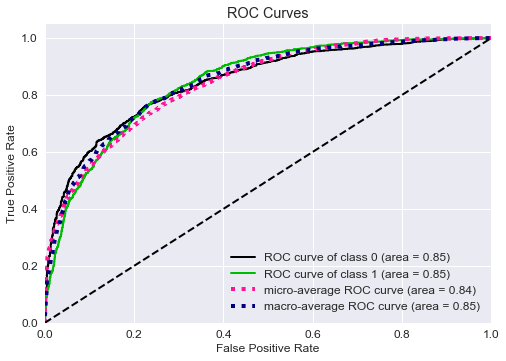

In [111]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(ytrain,logreg.predict_proba(xtrain))

In [112]:
print('\n Classifaction Report : \n\n',metrics.classification_report(ytest,logreg.predict(xtest)))
print('Accuracy :',metrics.accuracy_score(ytest,logreg.predict(xtest)))


 Classifaction Report : 

              precision    recall  f1-score   support

          0       0.90      0.75      0.82       790
          1       0.51      0.76      0.61       264

avg / total       0.80      0.75      0.77      1054

Accuracy : 0.753320683112


#### Stacking

In [113]:
# Train Predictions
sx = s.predict(np.matrix(xtrain))
sl = logreg.predict(xtrain)
sr = r.predict(xtrain)

In [114]:
# val Predictions
stx = s.predict(np.matrix(xtest))
strr = r.predict(xtest)
stl = logreg.predict(xtest)

In [115]:
# test Predictions
stxt = s.predict(np.matrix(te_x))
strrt = r.predict(te_x)
stlt = logreg.predict(te_x)

In [116]:
# Train
stack_train = pd.concat([pd.DataFrame(sx),pd.DataFrame(sr),pd.DataFrame(sl)],1)

In [117]:
# val
stack_test = pd.concat([pd.DataFrame(stx),pd.DataFrame(strr),pd.DataFrame(stl)],1)

In [118]:
# test
stack_t = pd.concat([pd.DataFrame(stxt),pd.DataFrame(strrt),pd.DataFrame(stlt)],1)

In [119]:
stack_train.shape

(4215, 3)

In [120]:
stack = RandomForestClassifier(max_depth=13)

In [121]:
stack.fit(stack_train,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
print('\n Classifaction Report : \n\n',metrics.classification_report(ytest,stack.predict(stack_test)))
print('\n Accuracy : ',metrics.accuracy_score(ytest,stack.predict(stack_test)))


 Classifaction Report : 

              precision    recall  f1-score   support

          0       0.88      0.84      0.86       790
          1       0.59      0.67      0.63       264

avg / total       0.81      0.80      0.80      1054


 Accuracy :  0.799810246679


#### MLP

In [123]:
from sklearn.neural_network import MLPClassifier

In [124]:
m = MLPClassifier(learning_rate='adaptive',hidden_layer_sizes=(75,75))

In [125]:
m.fit(xtrain,ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(75, 75), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [126]:
# Classification report and accuracy
print('\n Classifaction Report : \n\n',metrics.classification_report(ytest,m.predict(np.matrix(xtest))))
print('Accuracy :',metrics.accuracy_score(ytest,m.predict(np.matrix(xtest))))


 Classifaction Report : 

              precision    recall  f1-score   support

          0       0.84      0.87      0.86       790
          1       0.57      0.52      0.54       264

avg / total       0.78      0.78      0.78      1054

Accuracy : 0.781783681214


** Predictions On Test **

In [127]:
logreg.fit(x,y)

LogisticRegressionCV(Cs=100, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=20,
           refit=True, scoring='accuracy', solver='lbfgs', tol=0.0001,
           verbose=0)

In [128]:
p = logreg.predict(te_x)

In [129]:
labels = ['No','Yes']
churn=[]
for i in p:
    churn.append(labels[i])

In [130]:
churn = pd.DataFrame(churn,columns=['Churn']) 

In [131]:
preds = pd.concat([test,churn],1) # CustomerID and Churn

In [132]:
preds.to_csv('predictions.csv',index=False) # write to predictions.csv

** Patterns **

In [133]:
exp = tree.fit(xtrain,ytrain)  # gini
exp1 = entropy.fit(xtrain,ytrain) # Entropy

In [134]:
from sklearn.tree import export_graphviz
export_graphviz(exp,'patern.dot',class_names=['No','Yes'],feature_names=xtrain.columns)
export_graphviz(exp1,'entropy.dot',class_names=['No','Yes'],feature_names=xtrain.columns)